In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
cd drive/'My Drive'/'Colab Notebooks'/Road_seg

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Road_seg'
/content/drive/My Drive/Colab Notebooks/Road_seg


### Post-processing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow import keras
import os,sys
import albumentations as albu
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
n = 50
patch_size = 16 
window_size =16
img_test = []

for i in range(1, 51):
    image_filename = 'Datasets/test_set_images/test_' + str(i) + '/test_' + str(i) + '.png' 
    img_test.append(helperC.load_image(image_filename))
img_patches_test = [patcher_3000(img_test[i], patch_size, window_size) for i in range(n)]
img_patches_test = np.asarray([img_patches_test[i][j] for i in range(len(img_patches_test))
                               for j in range(len(img_patches_test[i]))])

In [0]:
model = keras.models.load_model('saved_M1_fit_SoftmaxCategorical_rotated_15.h5')
predictions = model.predict(img_patches_test)

#predictions = np.squeeze(helper.binarize_predictions(predictions))
#print(predictions.shape)
#print(predictions[10])

In [0]:
def patcher_3000(img, cp_size, p_size):
    list_patches = []
    padding = int((p_size - cp_size) / 2)
    padded_img = np.pad(img, ((padding, padding),(padding, padding), (0,0)), mode='symmetric')
    imgwidth = img.shape[0]
    imgheight = img.shape[1]


    for i in range(0, imgheight, cp_size):
        for j in range(0, imgwidth, cp_size):
            im_patch = padded_img[j:j+cp_size+2*padding, i:i+cp_size+2*padding, :]
            list_patches.append(im_patch)
            
    
    return list_patches

In [0]:
import cv2
def morphological(img):
    kernel1 = np.ones((1,1),np.uint8)
    kernel3 = np.ones((3,3),np.uint8)
    kernelcross = np.ones((3,3),np.uint8)
    kernelcross[0][0] = 0
    kernelcross[0][2] = 0
    kernelcross[2][0] = 0
    kernelcross[2][2] = 0
    kernel2 = np.ones((2,2),np.uint8)
    #op = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel1) 
    #op = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel2)
    op = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel2)
    op = cv2.morphologyEx(op,cv2.MORPH_OPEN,kernel1)
    op = cv2.morphologyEx(op,cv2.MORPH_OPEN,kernel1)   

    return op
  

In [0]:


#predictions = np.squeeze(helper.binarize_predictions(predictions))
predictions = (predictions[:,0] < predictions[:,1]) * 1
predictions = np.squeeze(predictions)

In [0]:
prediction_img =[]
prediction_no_mod = [] #For plotting purpose only
for i in range(50):
    #predictions = np.squeeze(helper.binarize_predictions(predictions))
    #prediction = helper.binarize_predictions_array(predictions[i*1444 :((i*1444)+1444)])
    pred = helperC.label_to_img_patches_test(predictions[i*1444 :((i*1444)+1444)])
    prediction_no_mod.append(pred)
    prediction= helperC.combine_surounded_patches(pred) #Which order? Is it even useful. 
    prediction= helperC.combine_surounded_patches(prediction) #Which order? Is it even useful. 
    prediction= helperC.remove_lonely_patches(prediction)
    #predictionmod = morphological(prediction)
    #rediction = morphological(pred)
    prediction_img.append(prediction) 

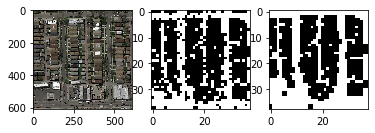

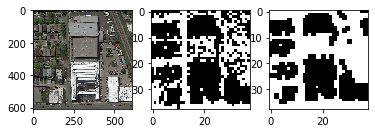

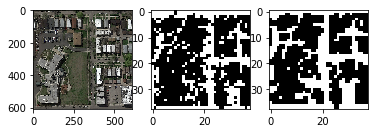

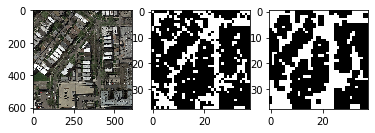

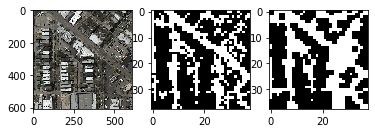

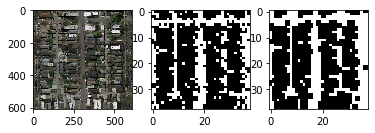

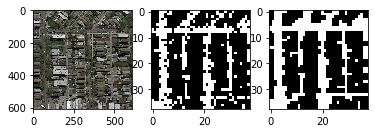

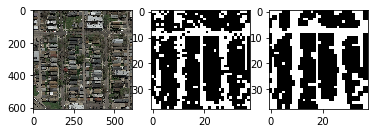

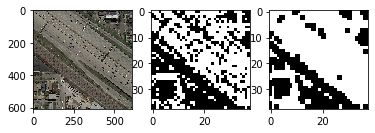

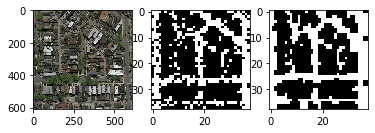

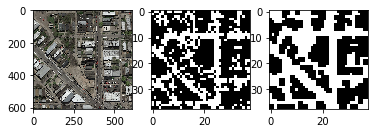

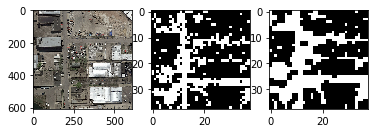

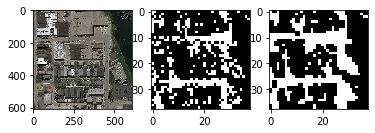

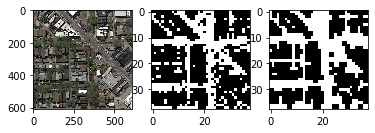

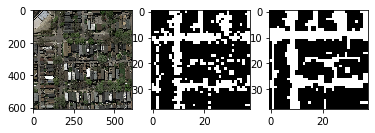

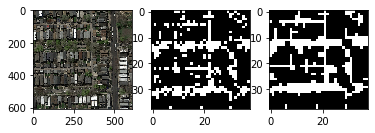

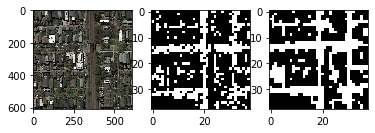

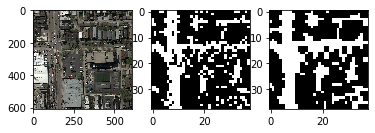

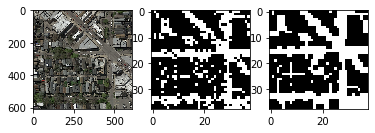

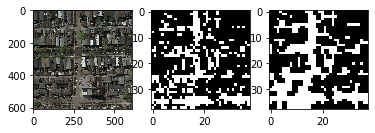

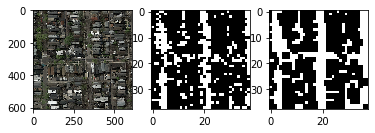

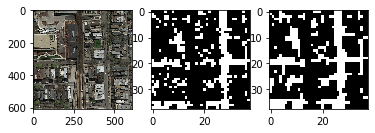

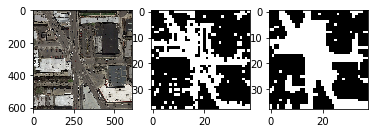

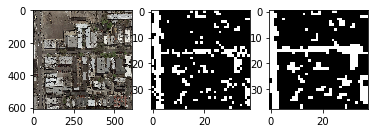

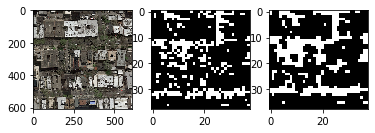

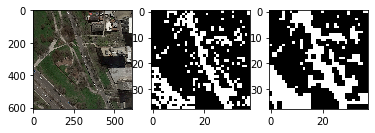

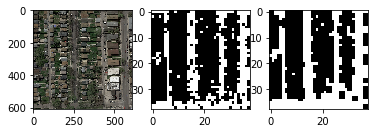

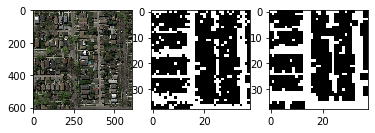

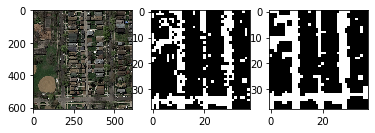

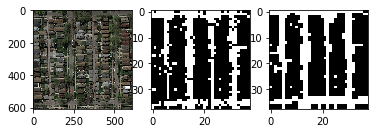

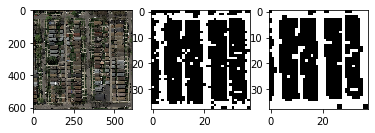

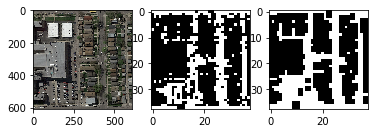

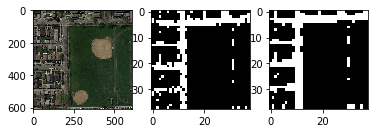

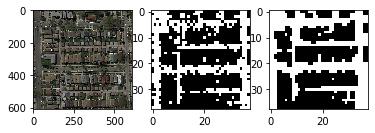

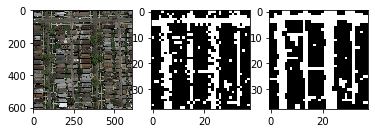

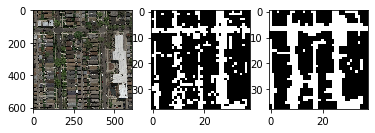

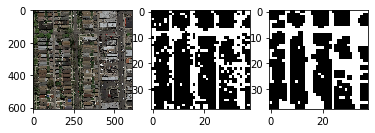

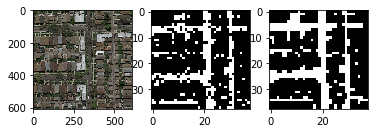

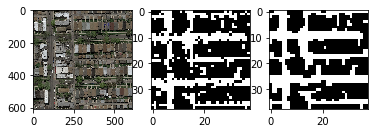

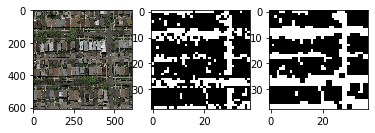

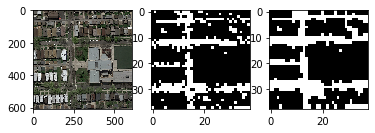

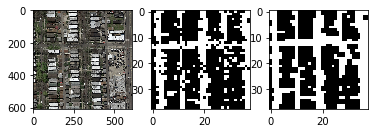

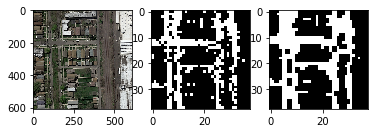

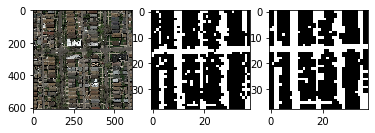

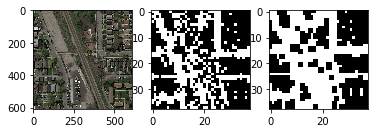

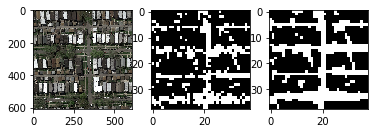

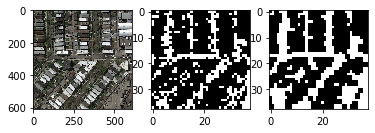

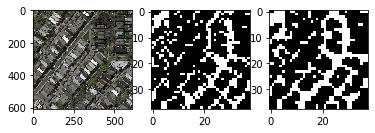

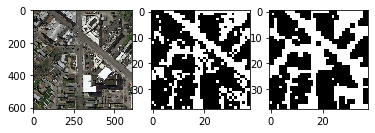

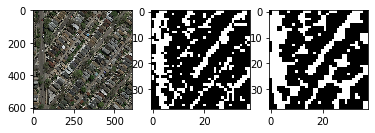

In [31]:
# Display prediction as an image

for i in range(len(img_test)):
#for i in range(10):

  img_idx = i
  image = img_test[img_idx]
  pred = prediction_img[img_idx]
  pred_no_mod = prediction_no_mod[img_idx]

  f = plt.figure()
  f.add_subplot(1,3, 1)
  plt.imshow(np.rot90(image,2))
  #Prediction before post processing
  f.add_subplot(1,3, 2)
  plt.imshow(np.rot90(pred_no_mod,2), cmap= 'Greys_r')
  #Prediction after post processing
  f.add_subplot(1,3, 3)
  plt.imshow(np.rot90(pred,2), cmap= 'Greys_r')
  
  plt.show(block=True)

